# CUSTOMER SEGMENTATION

<i>Comprendere il comportamento dei consumatori è essenziale per un'azienda.</i><br> 
<i>Ogni cliente ha un diverso processo di pensiero e atteggiamento verso l'acquisto di un particolare prodotto, quindi la segmentazione del cliente è necessaria..</i>

**Qual è l'importanza della segmentazione dei clienti?**
- Capire chi sono i clienti più preziosi e perché;
- Migliora il servizio clienti
- Differenziazione del cliente
- Creazione di campagne e annunci mirati per entrare in risonanza con e convertire segmenti di clienti
- Identificazione efficiente di nuove opportunità per prodotti, supporto e servizi

**Segmentazione dei clienti per Paese**<br> 
- <i>Il mercato del Regno Unito rappresenta l'86% delle nostre vendite totali e il 90% dei nostri clienti</i>.<br> 
- Segmentazione geografica: raggruppamento dei clienti in base alla loro posizione fisica.

In [1]:
import numpy as np
import pandas as pd

import math
import datetime as dt

#visualizations 
import missingno as msno
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

#predictive models
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import scale, StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.svm import SVC
from sklearn import preprocessing

import warnings
warnings.filterwarnings("ignore")

## 1. Data import

In [2]:
retail = pd.read_csv('OnlineRetail.csv', encoding='latin-1')
retail.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### 1.1 Data Insight

In [3]:
retail.shape

(541909, 8)

## 2. Data preprocessing and filtering

### 2.1 Missing data

In [4]:
retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

I campi "Description" e "CustomerID" hanno valori nulli. Rimuoviamo le righe con "CustomerID" non identificabile.

In [5]:
retail.dropna(subset=['CustomerID'],how='all',inplace=True)
retail.shape

(406829, 8)

In [6]:
retail.describe().round(2)

,Quantity,UnitPrice,CustomerID
count,406829.00,406829.00,406829.00
mean,12.06,3.46,15287.69
std,248.69,69.32,1713.60
min,-80995.00,0.00,12346.00
25%,2.00,1.25,13953.00
50%,5.00,1.95,15152.00
75%,12.00,3.75,16791.00
max,80995.00,38970.00,18287.00


Poichè ordini con prezzi unitari negativi o uguali a zero rappresentano chiaramente degli errori, rimuoveremo queste righe dal dataset.

In [7]:
retail = retail[retail['UnitPrice']> 0]

In [8]:
retail.shape

(406789, 8)

Nuovo dataset : 406.789 righe e 8 colonne

### 2.2 Creazione della colonna "TotalRevenue" che restituisce il ricavo totale per ciascun ordine.

In [9]:
retail["TotalRevenue"] = retail["Quantity"]* retail["UnitPrice"]
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalRevenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60


### 2.3 Gestione delle date
Cambiamo il tipo di valore ["InvoiceDate"] in datetime

In [10]:
retail['Invoice_Date'] = pd.to_datetime(retail['InvoiceDate'])
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalRevenue,Invoice_Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30,2010-12-01 08:26:00
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,2010-12-01 08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00,2010-12-01 08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,2010-12-01 08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,2010-12-01 08:26:00
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20,2011-12-09 12:50:00
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60,2011-12-09 12:50:00
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60,2011-12-09 12:50:00
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60,2011-12-09 12:50:00


In [11]:
retail['Year'] = pd.DatetimeIndex(retail['Invoice_Date']).year
retail['Month'] = pd.DatetimeIndex(retail['Invoice_Date']).month
retail['Day'] = pd.DatetimeIndex(retail['Invoice_Date']).day

## 3. EDA (Exploratory Data Analysis)

### 3.1 CLIENTI

In [12]:
uk = retail[retail['Country']=='United Kingdom']
uk.shape

(361854, 13)

In [13]:
customers = retail["CustomerID"].nunique()
uk_customers = uk["CustomerID"].nunique()
print("Total Customers:", customers)
print("Total Customers in UK:", uk_customers)
print('Percentage of Customers in UK : {}/{} ({:.2f}%) '.format(customers,uk_customers, uk_customers/customers*100))

Total Customers: 4371
Total Customers in UK: 3949
Percentage of Customers in UK : 4371/3949 (90.35%) 


### 3.2 FATTURE
**Filtro sulla colonna 'InvoiceNo' per valori che iniziano con ('5')**

In [14]:
orders = retail[retail['InvoiceNo'].astype(str).str.startswith('5')]

In [15]:
print("Total no. of invoices:", orders['InvoiceNo'].nunique())
print("No. of products sold:",orders['Quantity'].sum())
print("Total invoiced:",orders['TotalRevenue'].sum().round(2))
print("No. of customers:", retail['CustomerID'].nunique())

Total no. of invoices: 18532
No. of products sold: 5167812
Total invoiced: 8911407.9
No. of customers: 4371


### 3.3 NOTE DI CREDITO
**Filtro sulla colonna 'InvoiceNo' per valori che iniziano con ('C')**

In [16]:
cancelled_orders = retail[retail['InvoiceNo'].astype(str).str.startswith('C')]
cancelled_orders.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalRevenue,Invoice_Date,Year,Month,Day
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom,-27.50,2010-12-01 09:41:00,2010,12,1
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom,-4.65,2010-12-01 09:49:00,2010,12,1
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom,-19.80,2010-12-01 10:24:00,2010,12,1
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,-6.96,2010-12-01 10:24:00,2010,12,1
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,-6.96,2010-12-01 10:24:00,2010,12,1


In [17]:
print("Total no. of credit notes:", cancelled_orders['InvoiceNo'].nunique())
print("No. of products returned:",cancelled_orders['Quantity'].sum())
print("Total credited:",cancelled_orders['TotalRevenue'].sum().round(2))

Total no. of credit notes: 3654
No. of products returned: -274808
Total credited: -611342.09


### 3.4 PRODOTTI RESTITUITI (ordine crescente)

In [18]:
cancelled_orders.groupby("Description")["Quantity"].sum().sort_values(ascending = True)

Description
PAPER CRAFT , LITTLE BIRDIE           -80995
MEDIUM CERAMIC TOP STORAGE JAR        -74494
ROTATING SILVER ANGELS T-LIGHT HLDR    -9367
Manual                                 -3995
FAIRY CAKE FLANNEL ASSORTED COLOUR     -3150
                                       ...  
BLACK BAROQUE WALL CLOCK                  -1
RECYCLED ACAPULCO MAT TURQUOISE           -1
RECYCLED ACAPULCO MAT PINK                -1
BLACK HEART CARD HOLDER                   -1
FUNKY WASHING UP GLOVES ASSORTED          -1
Name: Quantity, Length: 1945, dtype: int64

### 3.5 ORDINI CANCELLATI
**Filtro sulla colonna 'InvoiceNo' per valori che contengono ('A')**

In [19]:
adjust = retail[retail['InvoiceNo'].astype(str).str.contains('A')]
adjust.head()
print("Total adjusts for bad debts:",len(adjust))
print("Total Adjusts:",adjust['TotalRevenue'].sum().round(2))

Total adjusts for bad debts: 0
Total Adjusts: 0.0


### 3.6 PREZZO MEDIO DEGLI ORDINI

In [20]:
round(orders.groupby("InvoiceNo")["UnitPrice"].sum().mean(),2)

66.91

In [21]:
orders.groupby("InvoiceNo")["UnitPrice"].sum().sort_values(ascending = False)

InvoiceNo
551697    8142.75
571751    6068.06
573080    4161.06
573077    4161.06
548813    4037.77
           ...   
556068       0.12
546390       0.12
567869       0.08
544152       0.06
560599       0.06
Name: UnitPrice, Length: 18532, dtype: float64

### 3.7 Numero di fatture per mese

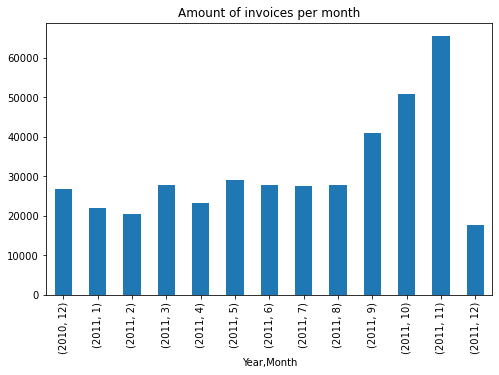

In [22]:
retail.groupby(['Year', 'Month']).InvoiceNo.count().plot(kind='bar', title='Amount of invoices per month', figsize=(8,5))
plt.show()

### 3.8 Numero di clienti per mese

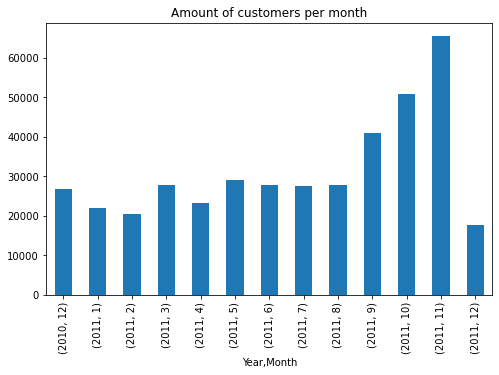

In [23]:
retail.groupby(['Year', 'Month']).CustomerID.count().plot(kind='bar', title='Amount of customers per month', figsize=(8,5))
plt.show()

### 3.9 Qual è il giorno migliore della settimana per vendere? Qual è l'ora migliore per vendere?

In [24]:
# HOUR
retail['Hour'] = retail['Invoice_Date'].dt.hour

# WEEKDAY. dt.weekday. The day of the week with Monday=0, Sunday=6.
#This method is available on both Series with datetime values or DatetimeIndex.
retail['WeekDay']=retail['Invoice_Date'].dt.weekday
retail['WeekDay'] = retail['WeekDay'].replace({0:'Mon', 1:'Thu',2:'Wed', 3:'Thur', 4:'Fri', 5:'Sat', 6:'Sun'})

### 3.10 Qual è il giorno migliore della settimana per vendere? Giovedì

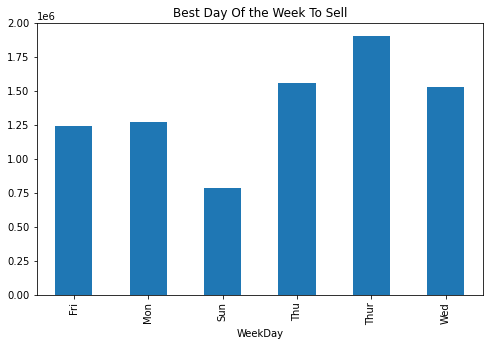

In [25]:
retail.groupby('WeekDay').TotalRevenue.sum().plot(kind='bar', title='Best Day Of the Week To Sell', figsize=(8,5))
plt.show()

### 3.11 Qual è l'ora migliore per vendere? Le 12 am

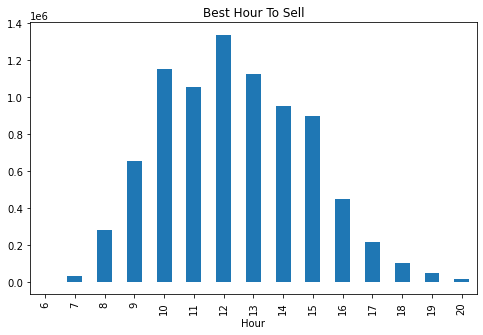

In [26]:
retail.groupby('Hour').TotalRevenue.sum().plot(kind='bar', title='Best Hour To Sell', figsize=(8,5))
plt.show()

In [27]:
retail.set_index("Invoice_Date", inplace= True)

In [28]:
retail.index = pd.to_datetime(retail.index)
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalRevenue,Year,Month,Day,Hour,WeekDay
Invoice_Date,,,,,,,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30,2010,12,1,8,Wed
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,Wed
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00,2010,12,1,8,Wed
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,Wed
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,Wed


In [29]:
# create excel writer object
writer = pd.ExcelWriter('dataset.xlsx')
# write dataframe to excel
retail.to_excel(writer)
# save the excel
writer.save()
print('DataFrame is written successfully to Excel File.')

DataFrame is written successfully to Excel File.


### 3.12 Numero di prodotti venduti per mese

In [30]:
retail.resample("M")["Quantity"].sum()

Invoice_Date
2010-12-31    296347
2011-01-31    269330
2011-02-28    262817
2011-03-31    343971
2011-04-30    278582
2011-05-31    367768
2011-06-30    356922
2011-07-31    363406
2011-08-31    385795
2011-09-30    537494
2011-10-31    569658
2011-11-30    657078
2011-12-31    203836
Freq: M, Name: Quantity, dtype: int64

### 3.13 Totale ricavi per mese

In [31]:
retail.resample("M")["TotalRevenue"].sum().round(2)

Invoice_Date
2010-12-31     554604.02
2011-01-31     475074.38
2011-02-28     436546.15
2011-03-31     579964.61
2011-04-30     426047.85
2011-05-31     648251.08
2011-06-30     608013.16
2011-07-31     574238.48
2011-08-31     616368.00
2011-09-30     931440.37
2011-10-31     974603.59
2011-11-30    1132407.74
2011-12-31     342506.38
Freq: M, Name: TotalRevenue, dtype: float64

Novembre è il mese con il maggior turnover

In [32]:
retail.resample("M")["TotalRevenue"].sum().round(2).max()

1132407.74

### 3.14 CLASSIFICA DEI PRODOTTI PIU' VENDUTI. (top 20 prodotti)

In [33]:
retail.groupby("Description")["Quantity"].sum().sort_values(ascending = False).head(20)

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53215
JUMBO BAG RED RETROSPOT               45066
ASSORTED COLOUR BIRD ORNAMENT         35314
WHITE HANGING HEART T-LIGHT HOLDER    34147
PACK OF 72 RETROSPOT CAKE CASES       33409
POPCORN HOLDER                        30504
RABBIT NIGHT LIGHT                    27094
MINI PAINT SET VINTAGE                25880
PACK OF 12 LONDON TISSUES             25321
PACK OF 60 PINK PAISLEY CAKE CASES    24163
BROCADE RING PURSE                    22960
VICTORIAN GLASS HANGING T-LIGHT       21984
ASSORTED COLOURS SILK FAN             21132
RED  HARMONICA IN BOX                 20912
JUMBO BAG PINK POLKADOT               19709
SMALL POPCORN HOLDER                  18208
60 TEATIME FAIRY CAKE CASES           17539
LUNCH BAG RED RETROSPOT               17145
HEART OF WICKER SMALL                 16640
JUMBO BAG STRAWBERRY                  16557
Name: Quantity, dtype: int64

### 3.15 Numero di Paesi
35 countries. 
2 country values categorized: "Unspecified", "European Community". 

In [34]:
countries = retail["Country"].nunique()
countries

37

### 3.16 Numero di prodotti venduti per Paese

In [35]:
products_total = retail.groupby("Country").count()["TotalRevenue"].sort_values(ascending = False)
products_total

Country
United Kingdom          361854
Germany                   9493
France                    8490
EIRE                      7483
Spain                     2532
Netherlands               2367
Belgium                   2069
Switzerland               1876
Portugal                  1480
Australia                 1256
Norway                    1085
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         57
Lebanon                     45


### 3.17 Ricavi per Paese

In [36]:
countries_total = retail.groupby('Country')['TotalRevenue'].sum().sort_values(ascending=False)
countries_total

Country
United Kingdom          6.767873e+06
Netherlands             2.846615e+05
EIRE                    2.502852e+05
Germany                 2.216982e+05
France                  1.967128e+05
Australia               1.370773e+05
Switzerland             5.573940e+04
Spain                   5.477458e+04
Belgium                 4.091096e+04
Sweden                  3.659591e+04
Japan                   3.534062e+04
Norway                  3.516346e+04
Portugal                2.905981e+04
Finland                 2.232674e+04
Channel Islands         2.008629e+04
Denmark                 1.876814e+04
Italy                   1.689051e+04
Cyprus                  1.294629e+04
Austria                 1.015432e+04
Singapore               9.120390e+03
Poland                  7.213140e+03
Israel                  6.994250e+03
Greece                  4.710520e+03
Iceland                 4.310000e+03
Canada                  3.666380e+03
Unspecified             2.667070e+03
Malta                   2.5054

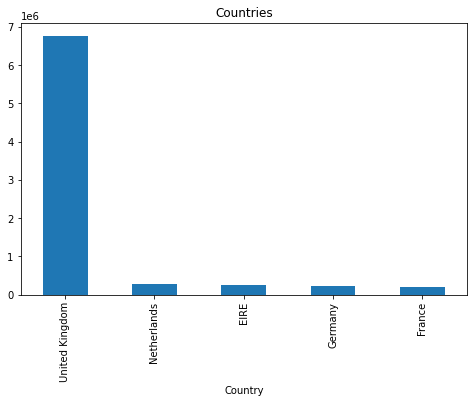

In [37]:
countries_total[:5].plot(kind='bar',title= "Countries", figsize=(8,5))
plt.show()

In [38]:
print('Percentage of sales in UK : {}/{} ({:.2f}%) '.format(countries_total[0].round(2),countries_total.sum().round(2), countries_total[0]/countries_total.sum()*100))
print('Percentage of products sold in UK : {}/{} ({:.2f}%) '.format(products_total[0].round(2),products_total.sum().round(2), products_total[0]/products_total.sum()*100))

Percentage of sales in UK : 6767873.39/8300065.81 (81.54%) 
Percentage of products sold in UK : 361854/406789 (88.95%) 


## 4. Feature Engineering

## 4.1 Analisi RFM

L'analisi RFM (recency, frequency, monetary) è un semplice metodo statistico per classificare i clienti in base al loro comportamento di acquisto.<br> Viene utilizzata per determinare quantitativamente quali clienti sono i migliori esaminando:<br> <u>quanto tempo fa un cliente ha acquistato</u> (recency), <u>quanto spesso acquistano</u> (frequency), and <u>quanto spende il cliente</u> (monetary).

- **RECENCY** (R): Giorni dall'ultimo acquisto<br> 
- **FREQUENCY** (F): Numero totale di acquisti<br> 
- **MONETARY VALUE** (M): Importo totale che quel consumatore ha speso.<br> 

L'analisi RFM è basata sul **Principio di Pareto (regola dell'80/20)** che ti dice che l'80% del tuo ricavo proviene dal 20% dei tuoi clienti. Si utilizza l'analisi RFM per identificare quel primo 20% di clienti e concentrarsi su quel segmento di mercato.

**Calcolo del RFM**<br>
Assegna un numero da 1 a 5 per ogni categoria, dove 5 è il valore più alto.
Per calcolare l'RFM, avremo bisogno dei seguenti dati sui clienti:

- La loro data di acquisto più recente.
- Numero di acquisti in un determinato periodo di tempo (es. un anno).
- Vendite totali da quel cliente (puoi anche utilizzare le vendite medie o il margine medio).<br> 


- **Step 1:** Calcolo del valore RFM
- **Step 2:** Calcolo del punteggio RFM
- **Step 3:** Calcolo del punteggio globale RFM
- **Step 4:** Individuazione delle etichette

Rimuoviamo le quantità negative o uguali a zero dal dataset

In [39]:
retail = retail[retail['Quantity']>0]
retail.shape

(397884, 14)

**<u>STEP 1: CALCULATE RFM VALUE</u>**

### 4.1.1 Recency

Quando è stata l'ultima volta che il cliente ha effettuato un acquisto? I clienti che hanno acquistato di recente hanno maggiori probabilità di acquistare di nuovo rispetto ai clienti che non acquistano da tempo. Questo è l'importante fattore di ranking: ecco perché è il primo della lista.

**Creiamo una nuova colonna "date" contenente la sola data della fattura**

In [40]:
retail['date'] = pd.to_datetime(retail['InvoiceDate']).dt.date
retail.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalRevenue,Year,Month,Day,Hour,WeekDay,date
Invoice_Date,,,,,,,,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30,2010,12,1,8,Wed,2010-12-01
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,Wed,2010-12-01
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00,2010,12,1,8,Wed,2010-12-01


**Ultima data disponibile nel dataset**

In [41]:
retail['date'].max()

datetime.date(2011, 12, 9)

In [42]:
lastdate = dt.date(2011,12,9)
print(lastdate)

2011-12-09


**Raggruppamento per clienti e controllo dell'ultima data di acquisto**

In [43]:
recency = retail.groupby(by='CustomerID', as_index=False)['date'].max()
recency.columns = ['CustomerID','LastPurschaseDate']
recency.head()

,CustomerID,LastPurschaseDate
0,12346.0,2011-01-18
1,12347.0,2011-12-07
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02


**Calcoliamo la recency**

In [44]:
recency['Recency'] = recency['LastPurschaseDate'].apply(lambda x: (lastdate - x).days)

In [45]:
recency.head(6)

,CustomerID,LastPurschaseDate,Recency
0,12346.0,2011-01-18,325
1,12347.0,2011-12-07,2
2,12348.0,2011-09-25,75
3,12349.0,2011-11-21,18
4,12350.0,2011-02-02,310
5,12352.0,2011-11-03,36


Rimuoviamo LastPurchaseDate,poichè non necessitiamo più di questo dato

In [46]:
recency.drop('LastPurschaseDate',axis=1,inplace=True)

### 4.1.2 Frequency

Con che frequenza acquista il cliente?
Un cliente che entra tutti i giorni è molto più propenso a comprare di nuovo rispetto a qualcuno che viene solo una volta all'anno.
Quante fatture sono registrate dallo stesso cliente?

In [47]:
retail_copy= retail
# drop duplicates
retail_copy.drop_duplicates(subset=['InvoiceNo', 'CustomerID'], keep="first", inplace=True)
#calculate frequency of purchases
frequency = retail_copy.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
frequency.columns = ['CustomerID','Frequency']
frequency.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


### 4.1.3 Monetary

Quanto ha speso il tuo cliente?
Un cliente che fa un grande acquisto ha maggiori probabilità di acquistare di nuovo rispetto a un cliente che spende meno.

In [48]:
monetary = retail.groupby(by='CustomerID',as_index=False).agg({'TotalRevenue': 'sum'})
monetary.columns = ['CustomerID','Monetary']
monetary.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12347.0,163.16
2,12348.0,331.36
3,12349.0,15.00
4,12350.0,25.20


### 4.1.4 Creazione Tabella RFM

Merge recency dataframe with frequency dataframe

In [49]:
temp = recency.merge(frequency,on='CustomerID')
temp.head()

,CustomerID,Recency,Frequency
0,12346.0,325,1
1,12347.0,2,7
2,12348.0,75,4
3,12349.0,18,1
4,12350.0,310,1


Unione con dataframe Monetary per ottenere una tabella con le 3 colonne

In [50]:
rfm = temp.merge(monetary,on='CustomerID')
#use CustomerID as index
rfm.set_index('CustomerID',inplace=True)
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,2,7,163.16
12348.0,75,4,331.36
12349.0,18,1,15.00
12350.0,310,1,25.20


Customer with ID = 12346 has recency: 325 days, frequency:1, and monetary: 77.183,60.<br> 
Customer with ID = 12747 has recency: 2 days, frequency:7, and monetary: 163,16.         

**RFM Table Correctness verification**, checking customer ID 12346<br> 
First customer bought only once, and only one product with huge amount.

In [51]:
retail[retail['CustomerID']==12346.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalRevenue,Year,Month,Day,Hour,WeekDay,date
Invoice_Date,,,,,,,,,,,,,,,
2011-01-18 10:01:00,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346.0,United Kingdom,77183.6,2011,1,18,10,Thu,2011-01-18


In [52]:
(lastdate - dt.date(2011,1,18)).days == 325

True

**<u>STEP 2: CALCULATE RFM SCORE</u>**

## 4.2 Principio di Pareto
Prima di passare ai segmenti di clientela, vediamo l'applicazione del principio di Pareto. <br> 
La regola di Pareto dice che l'80% dei risultati deriva dal 20% delle cause. Allo stesso modo, il 20% dei clienti contribuisce all'80% delle entrate totali. <br> 


In [53]:
total= rfm['Monetary'].sum() 
print("100% of total revenue is: ",round(total,2))

100% of total revenue is:  1288015.27


In [54]:
len(rfm)
print("80%",len(rfm)*0.80)
print("20%",len(rfm)*0.20)

80% 3470.4
20% 867.6


**80% of the Revenue**

In [55]:
pareto = rfm['Monetary'].sum()*0.8
print("80% of total revenue is: ",round(pareto,2))

80% of total revenue is:  1030412.22


**Top 20% of the customers**

In [56]:
pareto = (rfm['Monetary'].sum()*0.2)
print("20% of total revenue is: ",round(pareto,2))

20% of total revenue is:  257603.05


**Customers Rank**

In [57]:
customers_rank = rfm
# Create a new column that is the rank of the value of coverage in ascending order
customers_rank['Rank'] = customers_rank['Monetary'].rank(ascending=True)
#customers_rank.drop('RevenueRank',axis=1,inplace=True)
customers_rank.head()

,Recency,Frequency,Monetary,Rank
CustomerID,,,,
12346.0,325,1,77183.60,4337.0
12347.0,2,7,163.16,3450.0
12348.0,75,4,331.36,3890.0
12349.0,18,1,15.00,814.5
12350.0,310,1,25.20,1449.0


In [58]:
#sum the monetary values over the customer with rank <=784.2
revenueByTop20 = round(customers_rank[customers_rank['Rank'] <= 784.2]['Monetary'].sum(),1)
revenueByTop20
#Top 20% of customers did more than 80% of the revenue.

5900.1

In [59]:
customers_rank.sort_values('Rank',ascending=False)

,Recency,Frequency,Monetary,Rank
CustomerID,,,,
16446.0,0,2,168471.25,4338.0
12346.0,325,1,77183.60,4337.0
18102.0,0,60,42053.60,4336.0
15098.0,182,3,39916.50,4335.0
17949.0,1,45,29999.69,4334.0
...,...,...,...,...
14041.0,266,1,0.58,5.0
15503.0,362,1,0.42,3.5
15645.0,18,1,0.42,3.5


**Top Customers**

**Customer segmentation basata sul punteggio RFM**

Classifichiamo i clienti utilizzando i quartili.<br>
La classifica dei singoli punteggi RFM viene effettuata dividendo ciascuno dei valori RFM in quartili che creano quattro bucket uguali. Quindi, classifichiamo ogni bucket da 1 a 4; quattro è il migliore.

In [60]:
quantiles = rfm.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary,Rank
0.25,17.00,1.0,17.7000,1079.00
0.50,50.00,2.0,47.0500,2169.25
0.75,141.75,5.0,130.1025,3253.75


In [61]:
quantiles.to_dict()

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.75},
 'Frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 5.0},
 'Monetary': {0.25: 17.700000000000003, 0.5: 47.05, 0.75: 130.10250000000002},
 'Rank': {0.25: 1079.0, 0.5: 2169.25, 0.75: 3253.75}}

In [62]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [63]:
rfm_segmentation = rfm
rfm_segmentation['R'] = rfm_segmentation['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm_segmentation['F'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfm_segmentation['M'] = rfm_segmentation['Monetary'].apply(FMScore, args=('Monetary',quantiles,))

In [64]:
rfm_segmentation.head()

,Recency,Frequency,Monetary,Rank,R,F,M
CustomerID,,,,,,,
12346.0,325,1,77183.60,4337.0,1,1,4
12347.0,2,7,163.16,3450.0,4,4,4
12348.0,75,4,331.36,3890.0,2,3,4
12349.0,18,1,15.00,814.5,3,1,1
12350.0,310,1,25.20,1449.0,1,1,2


**Combine the RFM scores** <br>


In [65]:
rfm_segmentation['RFMScore'] = rfm_segmentation.R.map(str) + rfm_segmentation.F.map(str) + rfm_segmentation.M.map(str)
rfm_segmentation.head()

,Recency,Frequency,Monetary,Rank,R,F,M,RFMScore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4337.0,1,1,4,114
12347.0,2,7,163.16,3450.0,4,4,4,444
12348.0,75,4,331.36,3890.0,2,3,4,234
12349.0,18,1,15.00,814.5,3,1,1,311
12350.0,310,1,25.20,1449.0,1,1,2,112


**Top 10 customers**

In [66]:
rfm_segmentation[rfm_segmentation['RFMScore']=='444'].sort_values('Monetary', ascending=False).head(10)

,Recency,Frequency,Monetary,Rank,R,F,M,RFMScore
CustomerID,,,,,,,,
18102.0,0,60,42053.60,4336.0,4,4,4,444
17949.0,1,45,29999.69,4334.0,4,4,4,444
17450.0,8,46,26768.97,4333.0,4,4,4,444
14646.0,1,73,19045.06,4331.0,4,4,4,444
16013.0,3,47,17895.28,4330.0,4,4,4,444
16333.0,7,22,14418.96,4329.0,4,4,4,444
15769.0,7,26,11752.64,4327.0,4,4,4,444
14911.0,1,201,11071.48,4326.0,4,4,4,444
12901.0,8,28,9230.45,4325.0,4,4,4,444


In [67]:
#Classification based on these scores
print("Best Customers: ",len(rfm_segmentation[rfm_segmentation['RFMScore']=='444']))
print('Loyal Customers: ',len(rfm_segmentation[rfm_segmentation['F']==4]))
print("Big Spenders: ",len(rfm_segmentation[rfm_segmentation['M']==4]))
print('Almost Lost: ', len(rfm_segmentation[rfm_segmentation['RFMScore']=='244']))
print('Lost Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='144']))
print('Lost Cheap Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='111']))

Best Customers:  401
Loyal Customers:  872
Big Spenders:  1085
Almost Lost:  66
Lost Customers:  11
Lost Cheap Customers:  415


In [68]:
seg_map={r'[1-2][1-2]': "Hibernating", 
         r'[1-2]3': "At Risk", 
         r'[1-2]4':"Can't Lose", 
         r'31': "About to Sleep",
         r'32': "Need Attention", 
         r'33': "Loyal Customers", 
         r'34': "Promising", 
         r'41': "New Customers",
         r'4[2-3]': "Potential Loyalist", 
         r'44': "Champions"}

In [69]:
rfm["Segment"]=rfm["R"].astype(str)+ rfm["F"].astype(str)
rfm["Segment"]=rfm["Segment"].replace(seg_map,regex=True)

In [70]:
rfm.head()

,Recency,Frequency,Monetary,Rank,R,F,M,RFMScore,Segment
CustomerID,,,,,,,,,
12346.0,325,1,77183.60,4337.0,1,1,4,114,Hibernating
12347.0,2,7,163.16,3450.0,4,4,4,444,Champions
12348.0,75,4,331.36,3890.0,2,3,4,234,At Risk
12349.0,18,1,15.00,814.5,3,1,1,311,About to Sleep
12350.0,310,1,25.20,1449.0,1,1,2,112,Hibernating


Abbiamo aggiunto una colonna denominata "Segment" con i valori dei cluster definiti a priori ("Hibernating", "At Risk", "Can't Lose", "About to Sleep", "Need Attention", "Loyal Customers", "Promising", "New Customers", "Potential Loyalist", "Champions")

In [71]:
rfm.groupby('Segment').size().sort_values(ascending=False)

Segment
Hibernating           1597
Champions              523
Potential Loyalist     481
At Risk                450
Loyal Customers        366
About to Sleep         263
Promising              234
Need Attention         210
Can't Lose             115
New Customers           99
dtype: int64

In [72]:
# create excel writer object
writer = pd.ExcelWriter('cluster.xlsx')
# write dataframe to excel
rfm.to_excel(writer)
# save the excel
writer.save()
print('DataFrame is written successfully to Excel File.')

DataFrame is written successfully to Excel File.


## 5 Customer segmentation attraverso il clustering
**Applicazione del K-means clustering sulle variabili RFM**

### 5.1 Preprocessing dei Dati

In [73]:
rfm_data = rfm.drop(['Rank','R','F','M','RFMScore','Segment'],axis=1)
rfm_data.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,2,7,163.16
12348.0,75,4,331.36
12349.0,18,1,15.00
12350.0,310,1,25.20


### 5.2 Correlazione delle Feature

In [74]:
rfm_data.corr()

,Recency,Frequency,Monetary
Recency,1.000000,-0.260783,-0.033766
Frequency,-0.260783,1.000000,0.184146
Monetary,-0.033766,0.184146,1.000000


<AxesSubplot:>

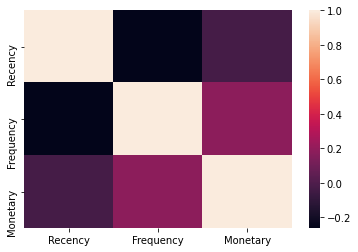

In [75]:
sns.heatmap(rfm_data.corr())

Da un lato abbiamo una correlazione negativa tra:

- Recency e Frequency
- Recency e Monetary

D'altra parte, la correlazione tra **Monetary e Frequency** è positiva, ma non così forte.

### 5.3 Distribuzione delle feature

Per comprendere meglio il dataset, possiamo costruire una matrice di dispersione di ciascuna delle tre feature presenti nei dati RFM. 

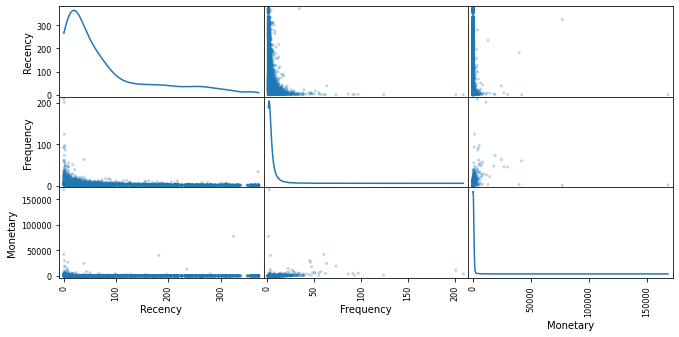

In [76]:
# Produce a scatter matrix for each pair of features in the data
scatter_matrix(rfm_data, alpha = 0.3, figsize = (11,5), diagonal = 'kde');

Possiamo notare che abbiamo una **distribuzione distorta** delle 3 variabili ed esistono **outlier**.

Ciò indica che è necessaria la normalizzazione per rendere le features dei dati normalmente distribuite poichè gli algoritmi di **clustering** richiedono che esse siano **normalmente distribuite**.

### 5.4 Data Normalization

In [77]:
#Applying log transformations
rfm_data['log_Recency'] = (rfm_data["Recency"]+0.001).apply(math.log)#can't take log(0) and so add a small number
rfm_data['log_Frequency'] = rfm_data["Frequency"].apply(math.log)
rfm_data['log_Monetary'] = (rfm_data["Monetary"]+0.001).apply(math.log)

#Preparing matrix for standard scaling transformation
X = rfm_data[["log_Recency", "log_Frequency", "log_Monetary"]].to_numpy()
#Standardize the features (mean 0 and std. dev 1)
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [78]:
rfm_data.head()

,Recency,Frequency,Monetary,log_Recency,log_Frequency,log_Monetary
CustomerID,,,,,,
12346.0,325,1,77183.60,5.783828,0.000000,11.253942
12347.0,2,7,163.16,0.693647,1.945910,5.094737
12348.0,75,4,331.36,4.317501,1.386294,5.803208
12349.0,18,1,15.00,2.890427,0.000000,2.708117
12350.0,310,1,25.20,5.736576,0.000000,3.226884


In [79]:
log_data = pd.DataFrame({'log_Monetary': rfm_data['log_Monetary'],'log_Recency': rfm_data['log_Recency'],'log_Frequency': rfm_data['log_Frequency']})
log_data.head()

,log_Monetary,log_Recency,log_Frequency
CustomerID,,,
12346.0,11.253942,5.783828,0.000000
12347.0,5.094737,0.693647,1.945910
12348.0,5.803208,4.317501,1.386294
12349.0,2.708117,2.890427,0.000000
12350.0,3.226884,5.736576,0.000000


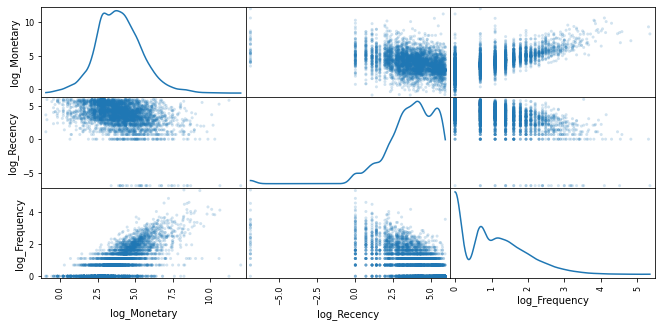

In [80]:
# Produce a scatter matrix for each pair of features in the data
scatter_matrix(log_data, alpha = 0.2, figsize = (11,5), diagonal = 'kde');

Le distribuzioni di Frequency e Monetary sono migliori, più normalizzate, ma questo non accade nel caso della Recency, che è migliorata ma non abbastanza.

<AxesSubplot:>

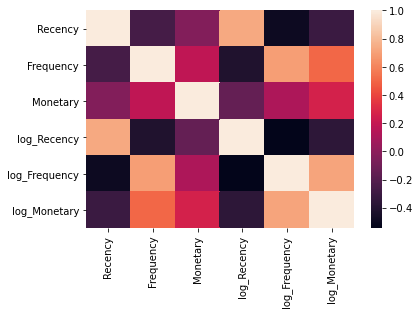

In [81]:
sns.heatmap(rfm_data.corr())

<AxesSubplot:>

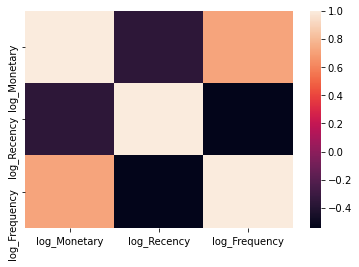

In [82]:
sns.heatmap(log_data.corr())

In [83]:
log_data.corr()

,log_Monetary,log_Recency,log_Frequency
log_Monetary,1.000000,-0.358093,0.720459
log_Recency,-0.358093,1.000000,-0.543143
log_Frequency,0.720459,-0.543143,1.000000


Ora Monetary e Frequency sono maggiormente correlate.

Text(0.5, 0, 'Monetary')

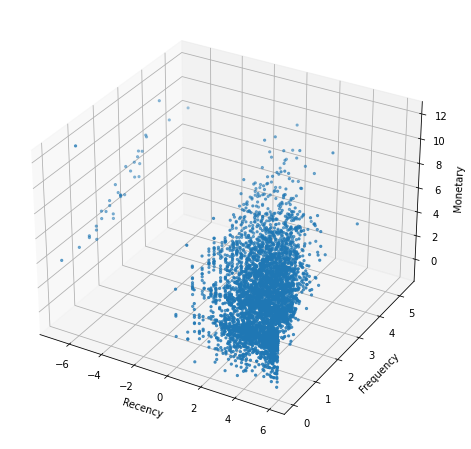

In [84]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

xs =rfm_data.log_Recency
ys = rfm_data.log_Frequency
zs = rfm_data.log_Monetary
ax.scatter(xs, ys, zs, s=5)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

**Osservazioni:**
- I clienti che hanno acquistato di recente articoli sono anche quelli che acquistano più frequentemente ed effettuano ordini di valore elevato;
- I clienti che hanno effettuato transazioni molto tempo fa, effettuano anche ordini di valore inferiore;
- I clienti che acquistano occasionalmente, non tendono ad acquistare articoli costosi.

### 5.5 Implementazione di K-means 

Il clustering è una tecnica di classificazione non supervisionata per individuare cluster presenti nei dati, ossia gruppi omogenei di classi. Utilizziamo l'algoritmo di clustering K-means per determinare i segmenti ideali di clienti.

Analisi della silhouette - Determina il numero ottimale di cluster
L'analisi della silhouette può essere utilizzata per studiare la distanza di separazione tra i cluster risultanti. Il grafico della silhouette mostra una misura di quanto è vicino ogni punto in un cluster ai punti nei cluster vicini e fornisce quindi un modo per valutare visivamente parametri come il numero di cluster.

Il coefficiente di silhouette (http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html) per un punto dati misura quanto esso sia simile al cluster assegnato da -1 (diverso) a 1 (simile).

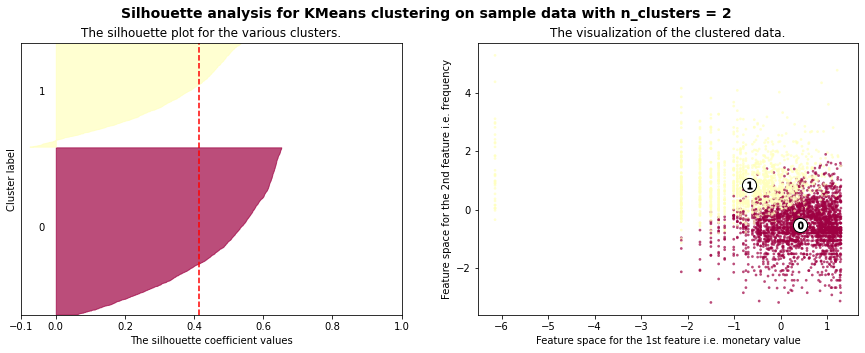

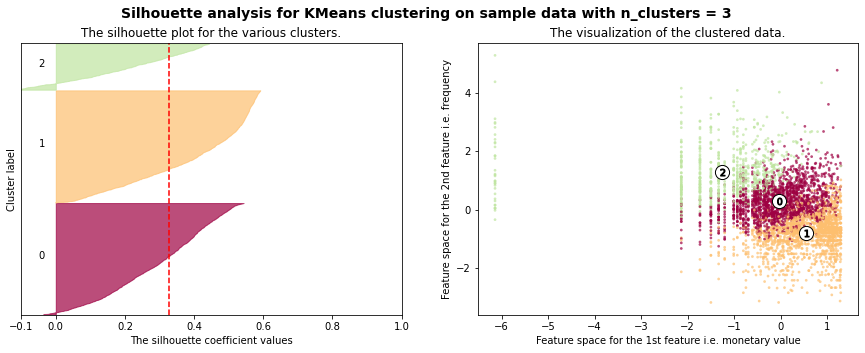

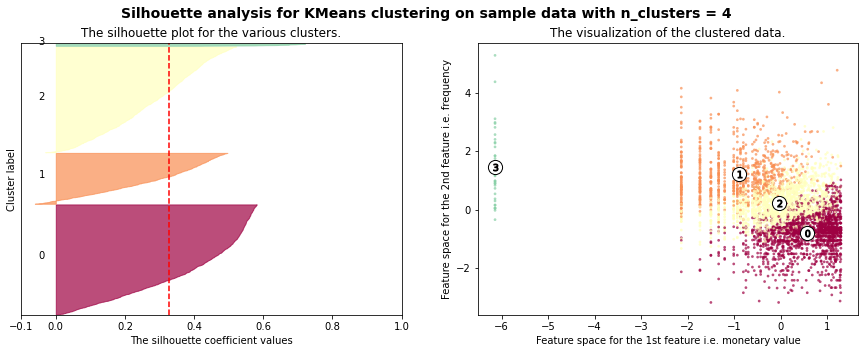

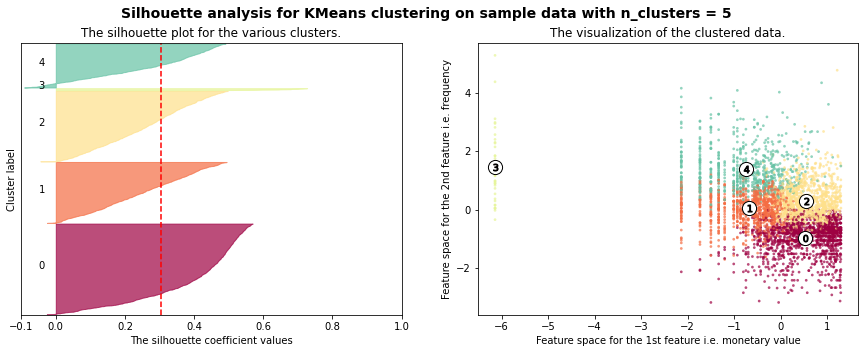

In [85]:
X = X_scaled

cluster_centers = dict()

for n_clusters in range(2,6):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 5)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    #Train a K-means clustering model with 3/ 5 clusters
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    
    #classify cluster labels based on training data
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    cluster_centers.update({n_clusters :{
                                        'cluster_center':clusterer.cluster_centers_,
                                        'silhouette_score':silhouette_avg,
                                        'labels':cluster_labels}
                           })

    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / n_clusters)
        #color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    colors = cmap(cluster_labels.astype(float) / n_clusters)
    feature1 = 0
    feature2 = 2
    ax2.scatter(X[:, feature1], X[:, feature2], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, feature1], centers[:, feature2], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[feature1], c[feature2], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature i.e. monetary value")
    ax2.set_ylabel("Feature space for the 2nd feature i.e. frequency")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

In [86]:
for n_clusters in range(2,6):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=100)
    kmeans.fit(X)
    clusters = kmeans.predict(X)
    silhouette_avg = silhouette_score(X, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.4138431811263991
For n_clusters = 3 The average silhouette_score is : 0.3276866883698254
For n_clusters = 4 The average silhouette_score is : 0.32587493414641056
For n_clusters = 5 The average silhouette_score is : 0.30831669387604543


Il **miglior punteggio silhouette** è ottenuto quando il **numero di clusters è 2**.

In [87]:
n_clusters = 2
kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
kmeans.fit(X)
clusters_customers = kmeans.predict(X)
silhouette_avg = silhouette_score(X, clusters_customers)

### 5.6 Visualizzazione dei Clusters

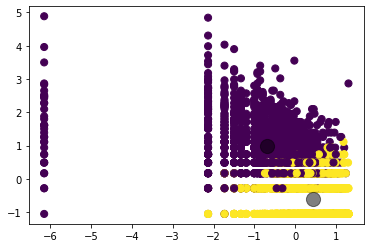

In [88]:
#create a scatter plot
plt.scatter(X[:, 0], X[:, 1], c=clusters_customers, s=50, cmap='viridis')
#select cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [89]:
# What's the number of customers in each cluster?
pd.DataFrame(pd.Series(clusters_customers).value_counts(), columns = ['NumberCustomers']).T

,1,0
NumberCustomers,2693,1645


Abbiamo ottenuto una visualizzazione dei cluster (segmenti di clienti) ma per arrivare a qualsiasi conclusione, dobbiamo ispezionare la Recency, la Frequency e la Monetary associati a ciascun cluster. Innanzitutto, è necessario riconvertire i valori trasformati in log.

In [90]:
for i in range(2,6):
    print("for {} number of clusters".format(i))
    cent_transformed = scaler.inverse_transform(cluster_centers[i]['cluster_center'])
    print(pd.DataFrame(np.exp(cent_transformed),columns=["log_Recency", "log_Frequency", "log_MonetaryValue"]))
    print()

for 2 number of clusters
   log_Recency  log_Frequency  log_MonetaryValue
0    82.533219       1.475791          22.676783
1    12.208936       6.292931         190.068569

for 3 number of clusters
   log_Recency  log_Frequency  log_MonetaryValue
0    37.203364       3.202881          79.163405
1   103.218905       1.171870          14.824074
2     4.572523      10.195764         361.585974

for 4 number of clusters
   log_Recency  log_Frequency  log_MonetaryValue
0   104.569968       1.162663          14.706621
1     8.532729       9.583410         340.705037
2    37.450173       3.046726          72.505333
3     0.001000      10.878940         480.323349

for 5 number of clusters
   log_Recency  log_Frequency  log_MonetaryValue
0   100.175843       1.098920          11.654731
1    12.179468       3.453842          54.549878
2   104.087885       2.377080          82.099226
3     0.001000      10.878940         480.323349
4    10.888705      10.487543         421.663162



### Osservazioni e deduzioni:  

#### *3 Clusters (Customer Segments):*
Esaminando attentamente la classificazione dei tre cluster, osserviamo i seguenti gruppi di clienti:

**1. Cliente ad alto valore:**
Il *'Cluster 2'* è il segmento di clienti di alto valore per il negozio di vendita al dettaglio online poiché i clienti di questo gruppo effettuano gli ordini di valore più elevato con una frequenza relativa molto elevata rispetto agli altri membri. Sono anche quelli che hanno effettuato le transazioni più di recente.

**2.Cliente a medio valore:**     
Il *'Cluster 0'* sembra essere il segmento di clienti di valore medio. Questi clienti effettuano un ordine di importo considerevole, anche se non tanto quanto i clienti di alto valore, ma comunque abbastanza superiore ai clienti di basso valore. Inoltre, i loro ordini sono relativamente più frequenti rispetto al segmento di valore più basso.

**3.Cliente a basso valore:**    
È abbastanza evidente che il *'Cluster 1'* ha clienti che fanno acquisti raramente e quando ordinano, i loro ordini hanno un valore piuttosto basso.

A parte i numeri, la visualizzazione dei cluster in *Silhoutte Analysis* mostra che tutti e tre i segmenti di clienti sono abbastanza distinti con una sovrapposizione molto minore tra loro. La tendenza generale in questi 3 cluster è che l'alto valore monetario è correlato all'alta frequenza degli ordini e a quelli più recenti.
   
#### *5 Clusters (Customer Segments):*   
In 5 clusters, troviamo i seguenti gruppi di clienti:

**1.Clienti di alto valore complessivo:**
Il *'Cluster 0'* è il tipico cliente di valore elevato che ha effettuato acquisti di recente e acquista regolarmente ordini di valore elevato.

**2. Alto valore monetario ma meno frequente:**
Il *'Cluster 1'* rappresenta un particolare segmento di clienti che effettuano ordini di valore piuttosto elevato ma non lo fanno frequentemente o non lo hanno fatto molto di recente. Ma questi clienti mantengono molte promesse se si vuole migliorare le vendite.

**3. Valore medio-bassa frequenza-clienti recenti:**
I clienti di *'Cluster 4'* hanno recentemente effettuato ordini di valore medio, ma non lo fanno frequentemente.

**4. Valore medio - bassa frequenza - clienti anziani:**
I clienti di *'Cluster 3'* hanno effettuato ordini di valore medio molto tempo fa e non lo fanno spesso.

**5. Clienti di basso valore:**
Il *'Cluster 2'* è il segmento di clienti che non effettuano acquisti da più tempo, né acquistano frequentemente e i loro ordini sono di valore inferiore.

La visualizzazione dei cluster in *Silhoutte Analysis* mostra alcune sovrapposizioni tra i segmenti di clientela.
Tuttavia, il dataset non distingue tra clienti all'ingrosso e al dettaglio, è molto probabile che i clienti frequenti di alto valore siano i rivenditori all'ingrosso e quelli di valore medio/basso siano i singoli acquirenti al dettaglio.
 
### Conclusioni:    
I segmenti di clientela così dedotti possono essere molto utili nel marketing mirato, nello scouting di nuovi clienti e, infine, nella crescita dei ricavi. Dopo aver conosciuto i tipi di clienti, dipende dalla politica del rivenditore se inseguire i clienti di alto valore e offrire loro un servizio e sconti migliori o cercare di incoraggiare i clienti di valore basso/medio a fare acquisti più frequentemente o con valori monetari più elevati.

In [91]:
n_clusters = 5
kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
kmeans.fit(X)
clusters_customers = kmeans.predict(X)
silhouette_avg = silhouette_score(X, clusters_customers)

In [92]:
pd.DataFrame(pd.Series(clusters_customers).value_counts(), columns = ['NumberCustomers']).T

,0,1,3,2,4
NumberCustomers,1470,1143,984,706,35


In [93]:
rfm_data ['Cluster'] = clusters_customers
label={0:'Overall high value customer' , 1: 'High monetary value but less frequent', 2: 'Low valued customers', 
       3: 'Medium value - low frequency - older customers', 4:'Medium value - low frequency - recent customers'}
rfm_data ['Segment'] = rfm_data ['Cluster'].map(label)

In [94]:
rfm_data.head()

,Recency,Frequency,Monetary,log_Recency,log_Frequency,log_Monetary,Cluster,Segment
CustomerID,,,,,,,,
12346.0,325,1,77183.60,5.783828,0.000000,11.253942,1,High monetary value but less frequent
12347.0,2,7,163.16,0.693647,1.945910,5.094737,2,Low valued customers
12348.0,75,4,331.36,4.317501,1.386294,5.803208,1,High monetary value but less frequent
12349.0,18,1,15.00,2.890427,0.000000,2.708117,0,Overall high value customer
12350.0,310,1,25.20,5.736576,0.000000,3.226884,0,Overall high value customer
